# Set up workspace

In [60]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
from scipy.stats import ttest_ind
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
#from eofs.xarray import Eof 

In [61]:
import cftime
import scipy

In [62]:
import sys
sys.path.append('/glade/u/home/czarakas/coupled_PPE/code/utils')

import make_multisimulation_dataset

In [63]:
from load_ensembles import *
import quick_map

In [64]:
path_in='/glade/work/czarakas/coupled_PPE/data/data_for_figures/annual_means/'

# Load data

In [65]:
ds = xr.open_dataset(path_in+'delta_TSKIN_Annual_mean_coupled.nc')
from load_gridcell_areas import *

In [66]:
ds_offline = xr.open_dataset(path_in+'delta_TSKIN_Annual_mean_offline.nc')

# Figure 1a

In [67]:
landweights_lat = landfrac/landfrac.sum(dim=['lon'])
TSKIN_zonal=(ds.TSKIN*landweights_lat).sum(dim=['lon'])

In [68]:
TSKIN_zonal=(ds.TSKIN*landweights_lat).sum(dim=['lon'])

In [69]:
descriptions=crosswalk.description.values

descs_plantwater=[ 'medlynslope, max',
 'medlynintercept, min',
                   'kmax, min',
 'kmax, max',
                   'medlynslope, min',
 'medlynintercept, max']

descs_hydro=['d_max, min',
 'd_max, max',
 'frac_sat_soil_dsl_init, min',
 'frac_sat_soil_dsl_init, max',
 'fff, min',
 'fff, max',
 'sand_pf, min',
 'sand_pf, max']

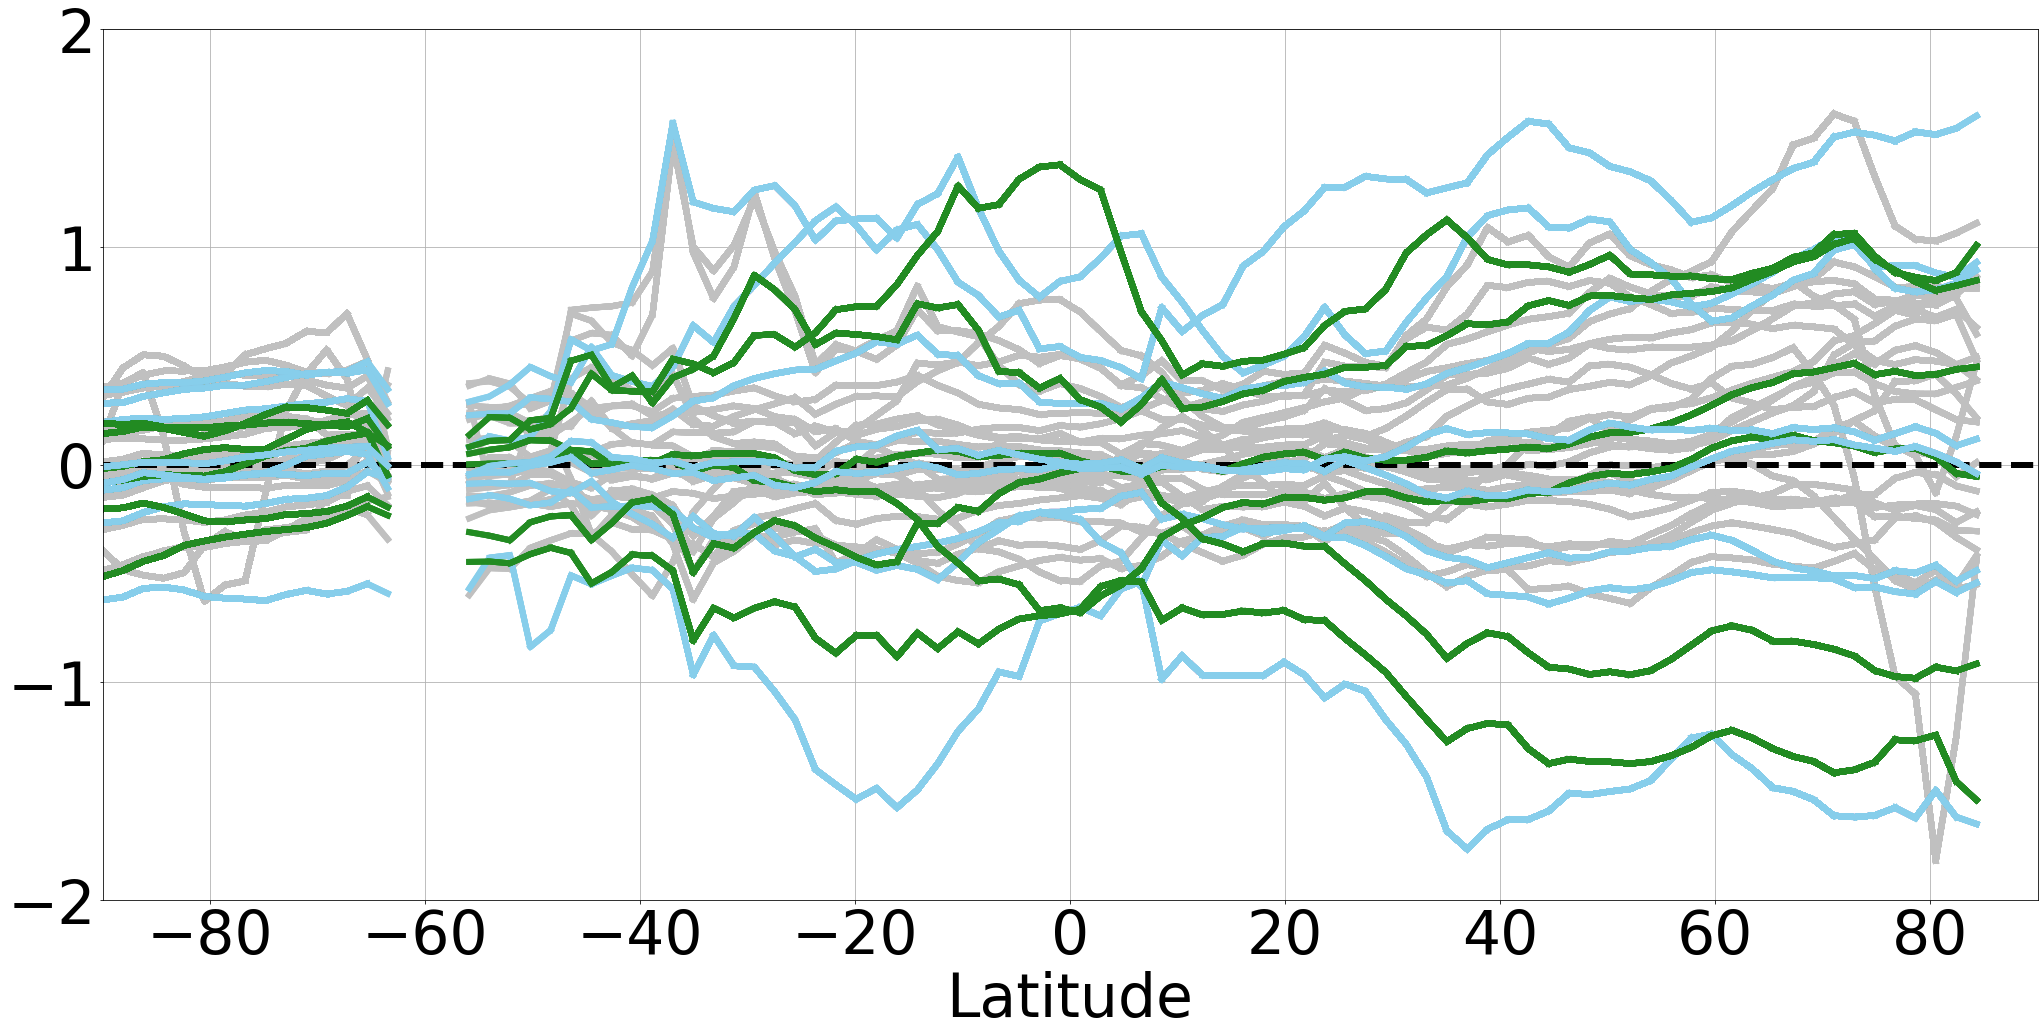

In [70]:
plt.rcParams.update({'font.size': 60})
plt.figure(figsize=(30,16))
plt.grid()
lwidth=6

for i,key in enumerate(ds.ensemble_key.values):
    desc=descriptions[i]
    if desc not in descs_plantwater:
        if desc not in descs_hydro:
            color='silver'
            plt.plot(TSKIN_zonal.lat, TSKIN_zonal[:,i].where(landweights_lat>0),color=color,linewidth=lwidth)
        
plt.axhline(y=0,linestyle='--',color='k', linewidth=lwidth)

for i,key in enumerate(ds.ensemble_key.values):
    desc=descriptions[i]
    if desc in descs_plantwater:
        color='forestgreen'
        plt.plot(TSKIN_zonal.lat, TSKIN_zonal[:,i].where(landweights_lat>0),color=color,linewidth=lwidth)
    elif desc in descs_hydro:
        color='skyblue'
        plt.plot(TSKIN_zonal.lat, TSKIN_zonal[:,i].where(landweights_lat>0),color=color,linewidth=lwidth)
plt.xlim([-90,90])
plt.ylim([-2,2])
plt.xlabel('Latitude')
plt.tight_layout()
plt.savefig('Figure1a.eps')    

In [23]:
valrange=(TSKIN_zonal.max(dim='ensemble_key')-TSKIN_zonal.min(dim='ensemble_key'))
valstd=(TSKIN_zonal.std(dim='ensemble_key'))

In [28]:
np.nanmax(valstd)

0.7298541256943106

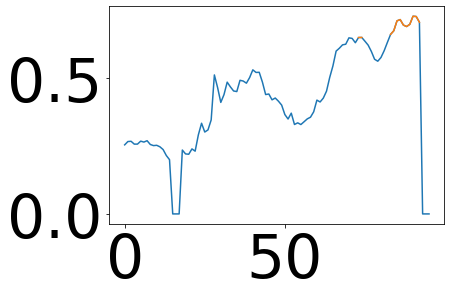

In [38]:
#plt.plot(valrange)
plt.plot(valstd)
plt.plot(valstd.where(valstd>0.65))

In [40]:
valstd.lat[valstd>=0.65]

<xarray.DataArray 'lat' (lat: 13)>
array([42.63158 , 48.31579 , 50.210526, 67.26316 , 69.1579  , 71.052635,
       72.947365, 74.8421  , 76.73684 , 78.63158 , 80.52631 , 82.42105 ,
       84.31579 ], dtype=float32)
Coordinates:
  * lat      (lat) float32 42.63158 48.31579 50.210526 ... 82.42105 84.31579
Attributes:
    long_name:  coordinate latitude
    units:      degrees_north

In [13]:
global_avg=(ds.TSKIN*landweights).mean(dim=['lat','lon'])

In [14]:
np.nanmax(global_avg)-np.nanmin(global_avg)

2.2308250666944245

In [17]:
np.round(np.std(global_avg),2)

<xarray.DataArray ()>
array(0.47)

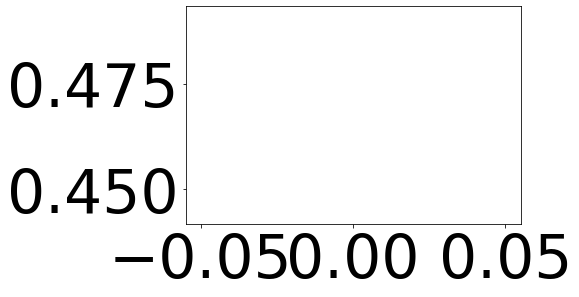

In [29]:
plt.plot(np.std(global_avg))

# Figure 1b

In [42]:
delta_Ts=(ds.TSKIN*landweights).mean(dim=['lat','lon'])
delta_Ts_offline=(ds_offline.TSKIN*landweights).mean(dim=['lat','lon'])

In [43]:
crosswalk['delta_TSKIN']=np.nan
crosswalk['delta_TSKIN_offline']=np.nan
for i, key in enumerate(ds.ensemble_key.values):
    crosswalk.loc[crosswalk.Key_short==key,['delta_TSKIN']]=delta_Ts.values[i]
    crosswalk.loc[crosswalk.Key_short==key,['delta_TSKIN_offline']]=delta_Ts_offline.values[i]

In [59]:
crosswalk['delta_TSKIN']/crosswalk['delta_TSKIN_offline']

1      10.419613
2       7.981280
3       9.091868
4       6.607248
5       7.876316
6      10.911659
7       6.072965
8       3.620169
9       5.221703
10      6.595042
11    -23.246547
12    -21.042791
13    -68.370996
14    137.935579
15      6.824221
16      9.198491
17      7.237550
18      4.364607
19      6.747068
20      6.094368
21      6.616016
22     22.715544
23      1.228935
24      2.546469
25      3.162501
26      9.844551
27      5.503877
28     20.771061
29      3.678214
30      1.958231
31      2.049874
32      2.438184
33     -2.554709
34      3.121722
35      0.104185
36     -0.023386
dtype: float64

In [44]:
params=['frac_sat_soil_dsl_init','d_max', 'fff','sand_pf',
        'upplim_destruct_metamorph', 
        'z0mr', 'zetamaxstable', 'zsno',
        'medlynintercept','kmax','medlynslope',
        'jmaxb0', 'jmaxb1', 'tpu25ratio',
        'maximum_leaf_wetted_fraction',
        'rhosnir',
        'lmrha',
        'nstem',
        ]
param_colors=['skyblue','skyblue', 'skyblue','skyblue',
        '#F8CBAD', 
              'purple', 'purple', 'purple',
        'forestgreen', 'forestgreen', 'forestgreen',
        'lightseagreen', 'lightseagreen','lightseagreen',
              '#6CD2E9',
              'goldenrod',
              'lightgreen',
        'orange',
              ]

In [45]:
legend_categories=['Soil hydrology',
        'Snow', 
        'Roughness / boundary layer',
        'Plant water use',
        'Photosynthesis',
                   'Canopy evaporation',
        'Plant radiative properties',
        'Temperature acclimation',
        'Biomass heat storage',
        ]
category_colors=['skyblue',
        '#F8CBAD', 
              'purple', 
        'forestgreen', 
        'lightseagreen', 
               '#6CD2E9',
              'goldenrod',
              'lightgreen',
        'orange',
              ]

### Make legend

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


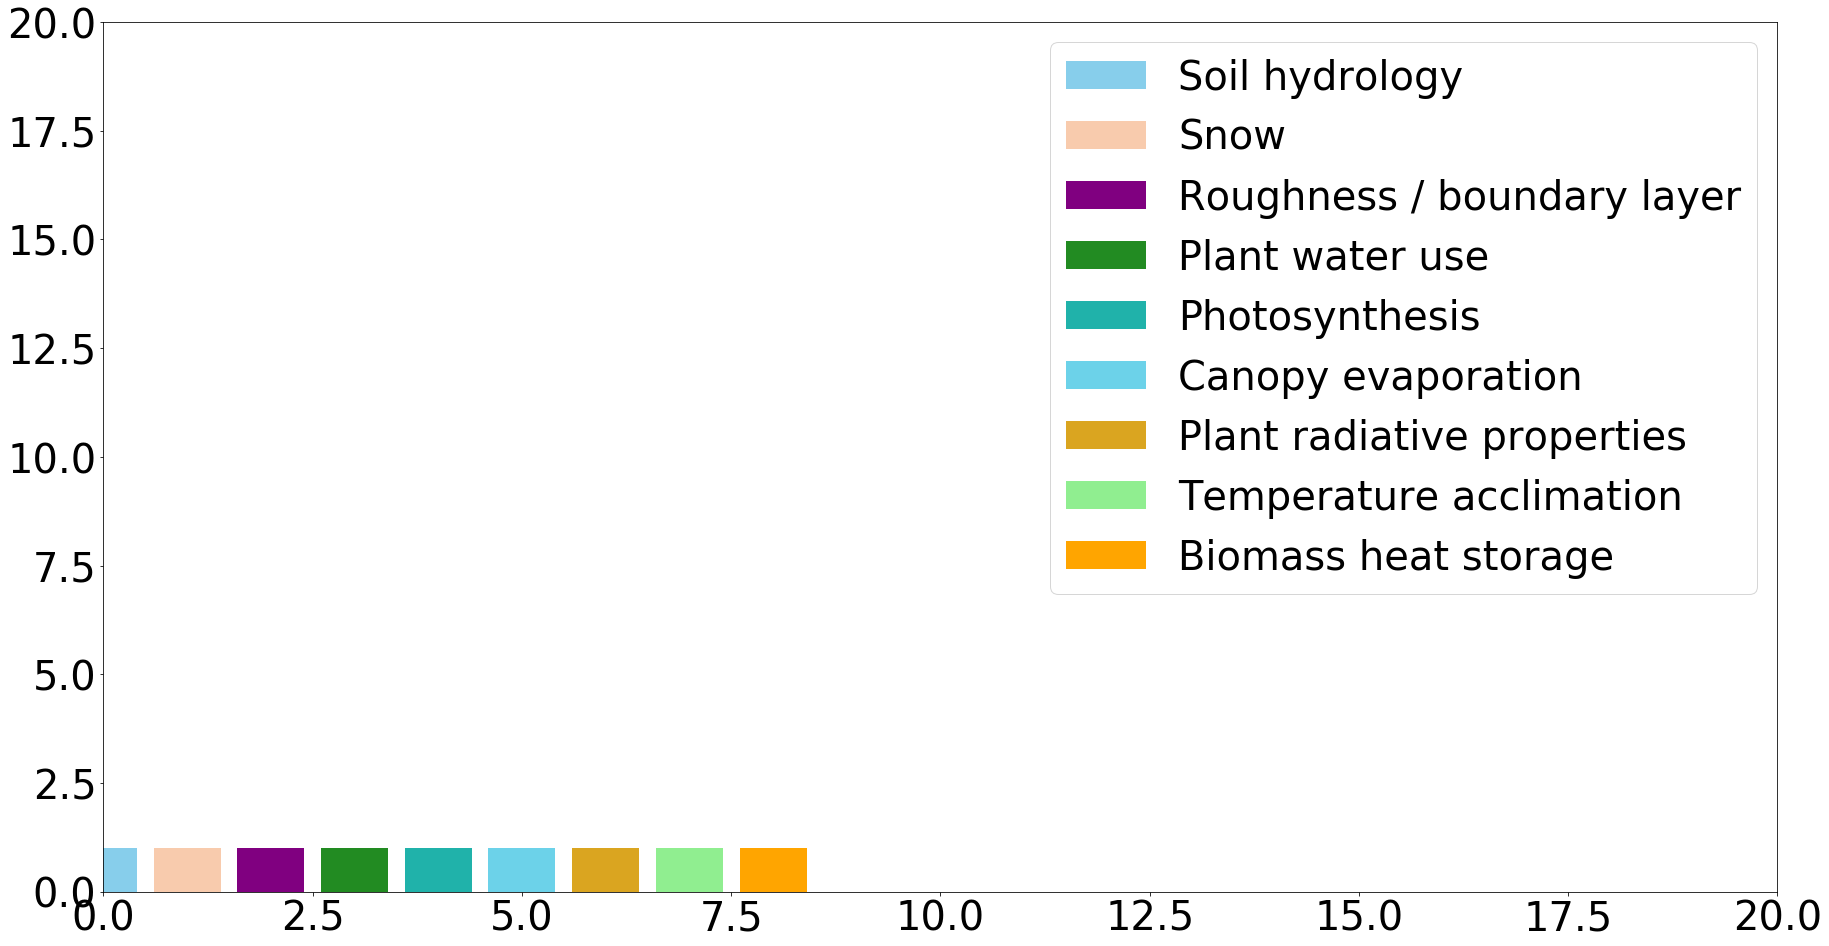

In [46]:
plt.rcParams.update({'font.size': 40})
plt.figure(figsize=(30,16))
for i, category in enumerate(legend_categories):
    plt.bar(i,1, color=category_colors[i], label=category)
plt.ylim([0,20])
plt.xlim([0,20])
plt.legend()
plt.savefig('Figure1b_legend.eps')  

### Make figure

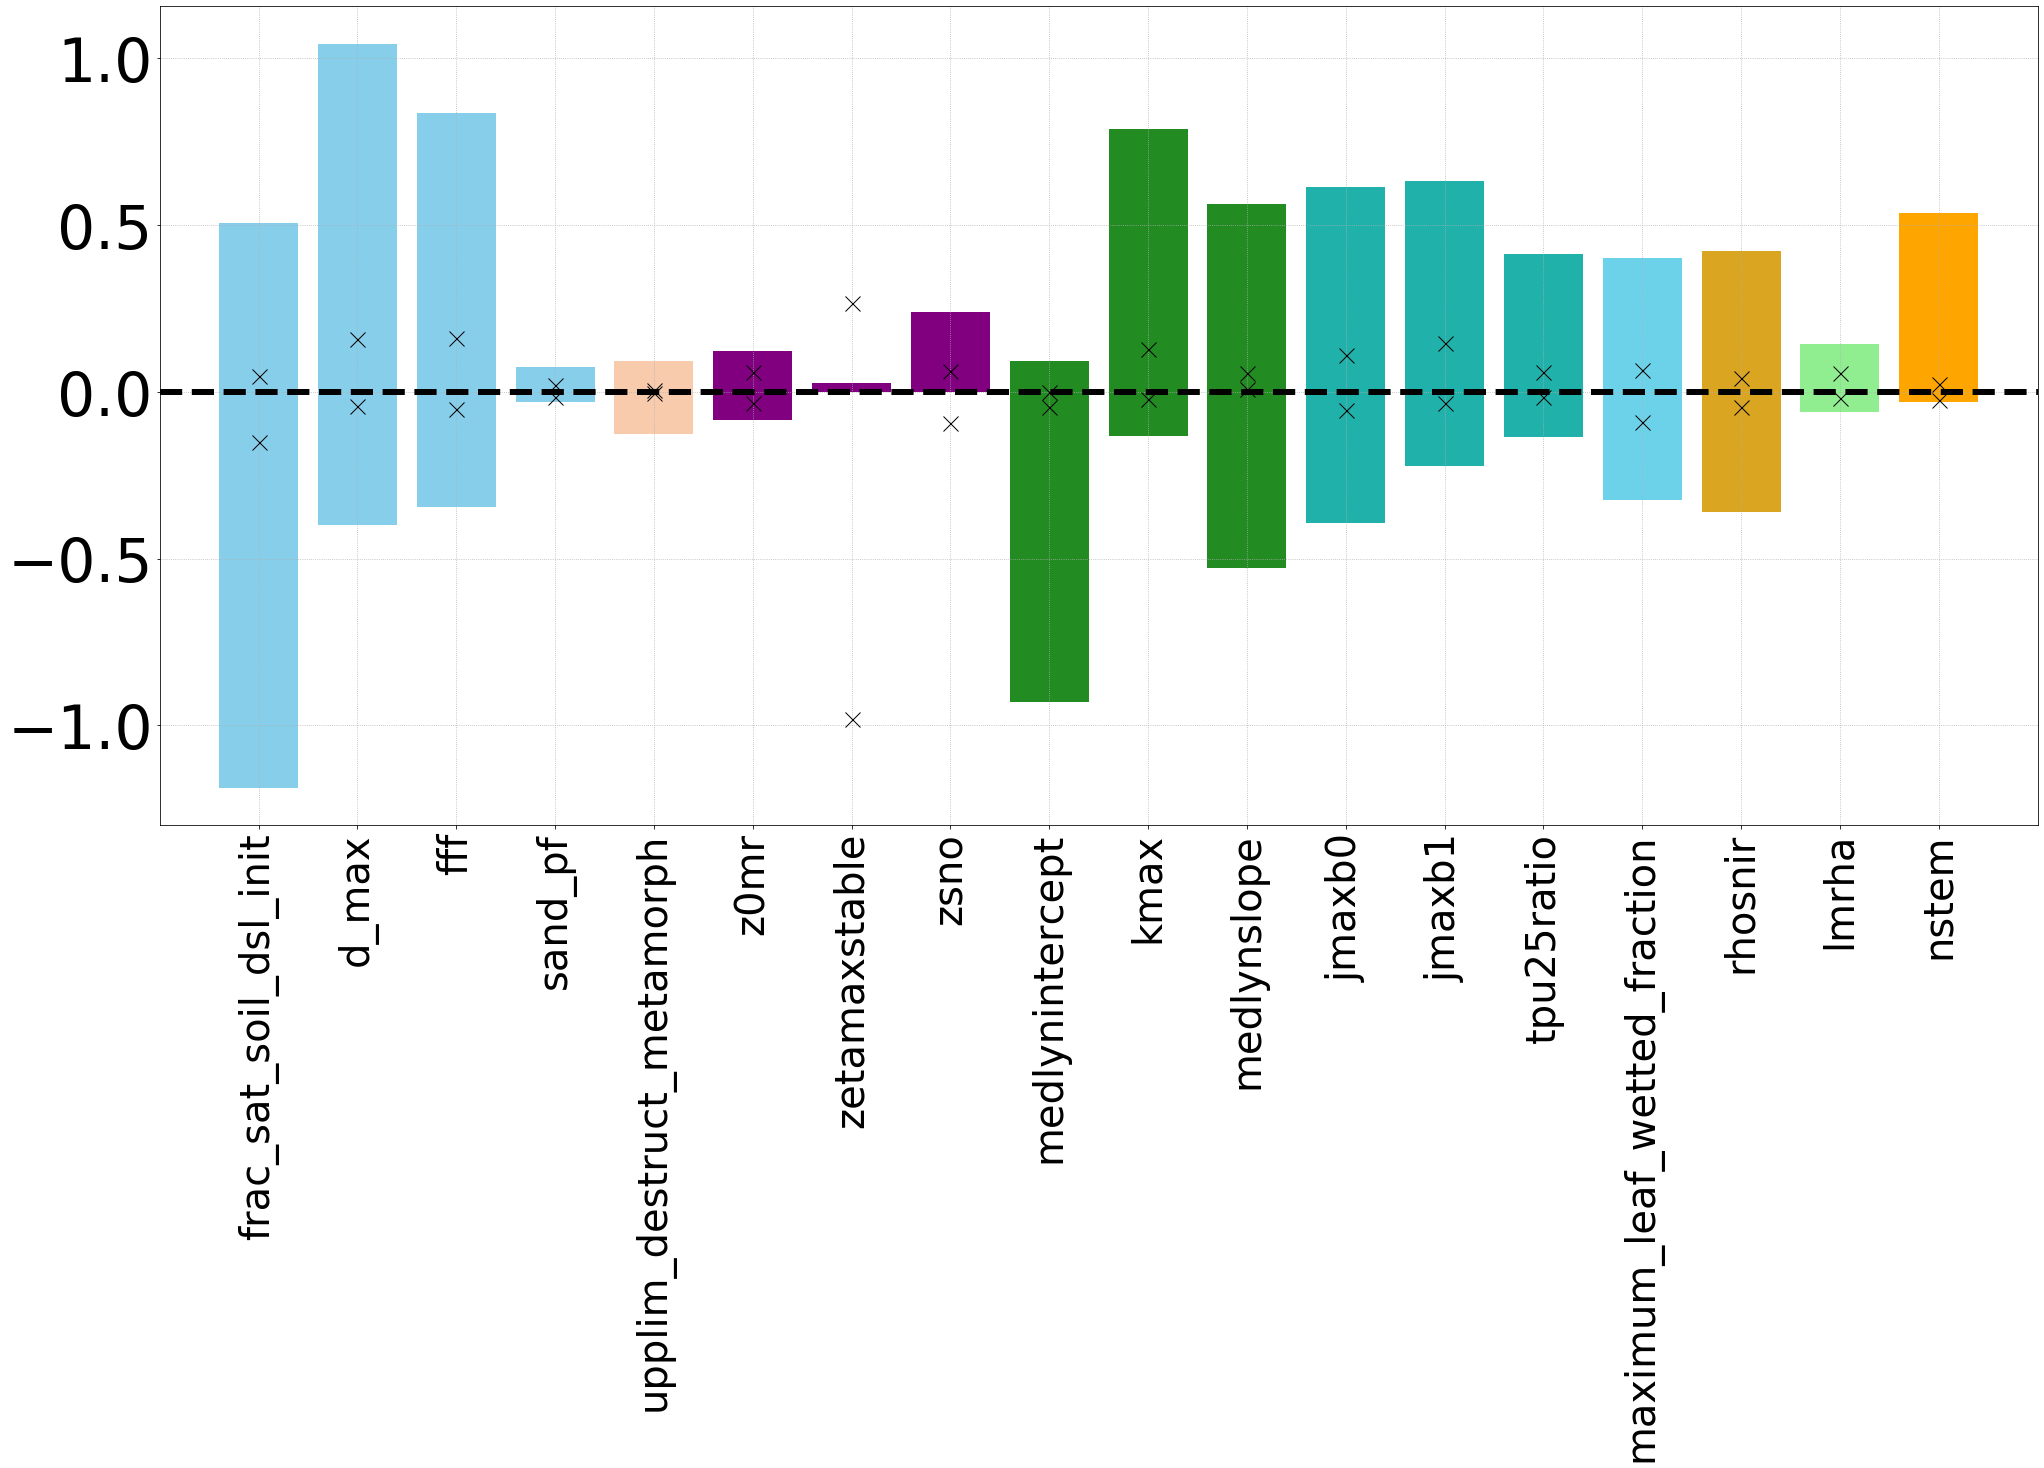

In [50]:
plt.rcParams.update({'font.size': 60})
plt.figure(figsize=(30,22))
plt.axhline(y=0,linestyle='--',color='k', linewidth=lwidth)

for i, param in enumerate(params):
    minval=crosswalk['delta_TSKIN'].values[crosswalk.description==param+', min']
    maxval=crosswalk['delta_TSKIN'].values[crosswalk.description==param+', max']
    minval_offline=crosswalk['delta_TSKIN_offline'].values[crosswalk.description==param+', min']
    maxval_offline=crosswalk['delta_TSKIN_offline'].values[crosswalk.description==param+', max']
    plt.bar(i,minval, color=param_colors[i])
    plt.bar(i,maxval, color=param_colors[i])
    plt.plot(i, minval_offline, 'xk', markersize=15)
    plt.plot(i, maxval_offline, 'xk', markersize=15)
    
    #minval_PC0=crosswalk['PC0'].values[crosswalk.description==param+', min']
    #maxval_PC0=crosswalk['PC0'].values[crosswalk.description==param+', max']
    #plt.plot([i,i], 
    #         [minval_PC0,maxval_PC0],'x', markersize=20,linewidth=8, color='k')
    
    

xticks=plt.xticks(np.arange(0, i+1), params, rotation='vertical',fontsize=40)
plt.grid(linestyle=':')
plt.xlim([-1,np.size(params)])
plt.tight_layout()
plt.savefig('Figure1b.eps')

In [104]:
print(1)

1
